# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [2]:
df[:2]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1


## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [3]:
monthly_avg_rent = df['count'].resample('ME').mean()
monthly_avg_rent

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
2011-06-30    196.877193
2011-07-31    203.614035
2011-08-31    182.666667
2011-09-30    174.622517
2011-10-31    174.773626
2011-11-30    155.458333
2011-12-31    134.173246
2012-01-31    124.353201
2012-02-29    145.646154
2012-03-31    208.276923
2012-04-30    257.455947
2012-05-31    264.109649
2012-06-30    287.186404
2012-07-31    267.037281
2012-08-31    285.570175
2012-09-30    292.598684
2012-10-31    280.508772
2012-11-30    231.980220
2012-12-31    217.054825
Freq: ME, Name: count, dtype: float64

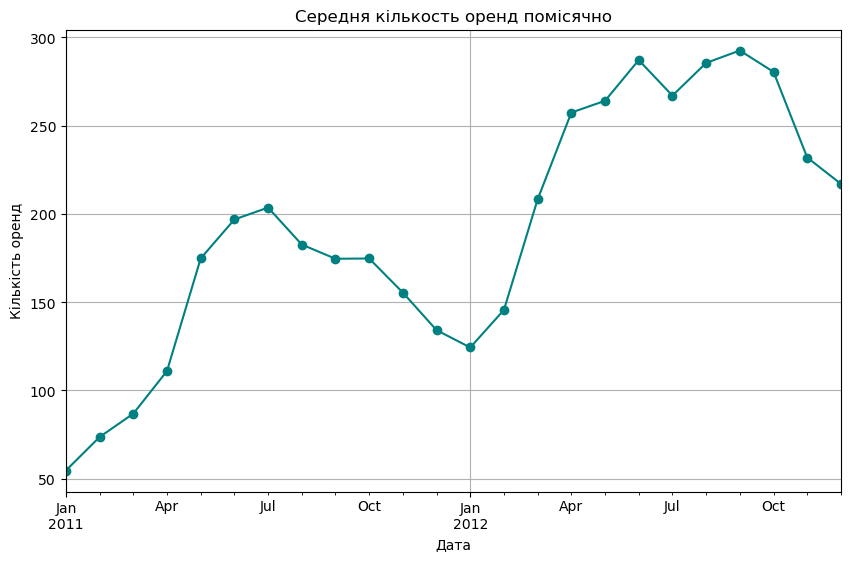

In [4]:
# Лінійний графік з Pandas
monthly_avg_rent.plot(
    marker='o',
    color='teal',
    figsize=(10,6),
    title='Середня кількость оренд помісячно',
    xlabel='Дата',
    ylabel='Кількість оренд',
    grid=True
);

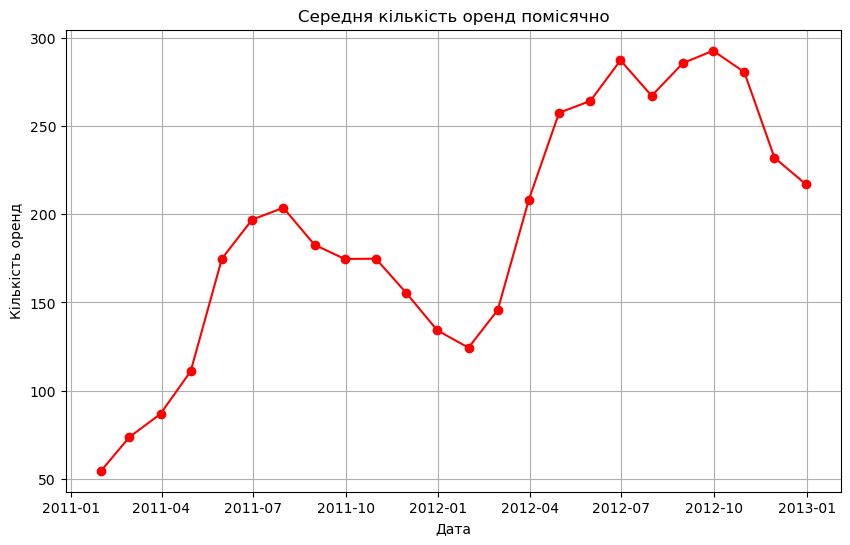

In [5]:
# Лінійний графік з Matplotlib
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_rent, 'o-', color='red')
plt.title('Середня кількість оренд помісячно')
plt.xlabel('Дата')
plt.ylabel('Кількість оренд')
# plt.xticks(
#     ticks=monthly_mean_rent.index,
#     labels=[d.strftime('%Y-%m') for d in monthly_mean_rent.index],
#     rotation=45
# )         # Щоб не було візуального зсуву праворуч по осі x
plt.grid(True);

**Порівняння двох графіків**  
- Графіки візуально однакові, але є деякі відмінності:
    - при побудові з Pandas графік дотикається рамки, з Matplotlib - ні;
    - з Matplotlib сітка будується і вертикальна, і горизонтальна;
    - з Pandas більш правильно підписані значення по осі Ox, а з Matplotlib вони візуально посунуті праворуч, і можливе неправильне розуміння графіка.
- Більше мені подобається графік, побудований з Pandas, оскільки більш зрозумілі позначки на осі Ox.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [6]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

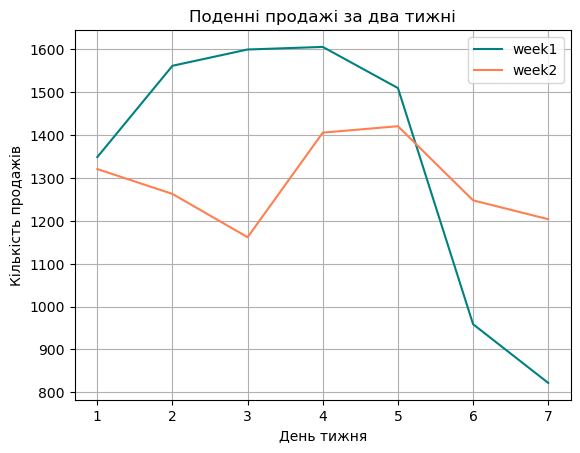

In [7]:
plt.plot(days, sales_week1, label='week1', color='teal')
plt.plot(days, sales_week2, label='week2', color='coral')

plt.title('Поденні продажі за два тижні')
plt.xlabel('День тижня')
plt.ylabel('Кількість продажів')
plt.grid(True)
plt.legend()
plt.show();

**Висновки**  
- Для week2 продажі більш стабільні, тому що зорово кількість продажів за кожен не дуже відрізняється.
- Можна обчислити такі показники, як стандартне відхилення, розмах, медіану та середнє значення, щоб підкрипити припущення. Менші значення для week2 стандартного відхилення та розмаху вказують на те, що тут продажі більш стабільні.

In [8]:
summary = {
    'Week 1': {
        'Середнє': np.mean(sales_week1),
        'Медіана': np.median(sales_week1),
        'Розмах': max(sales_week1) - min(sales_week1),
        'Ст. відхилення': np.std(sales_week1)
    },
    'Week 2': {
        'Середнє': np.mean(sales_week2),
        'Медіана': np.median(sales_week2),
        'Розмах': max(sales_week2) - min(sales_week2),
        'Ст. відхилення': np.std(sales_week2)
    }
}

# Перетворюємо словник на таблицю
summary_df = pd.DataFrame(summary)
summary_df.round(2)

,Week 1,Week 2
Середнє,1344.0,1289.29
Медіана,1510.0,1263.00
Розмах,784.0,259.00
Ст. відхилення,300.0,90.91


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [9]:
monthly_avg_temp = df.groupby('month')['temp'].mean()
monthly_avg_temp

month
1      9.840000
2     11.798535
3     15.902175
4     18.718372
5     22.674079
6     27.064496
7     30.841711
8     29.736689
9     25.779032
10    20.933853
11    15.185752
12    13.831206
Name: temp, dtype: float64

In [10]:
season_avg_rent = df.groupby('season')['count'].mean()
season_avg_rent

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

In [11]:
seasons = df['season'].unique()
seasons

array([1, 2, 3, 4], dtype=int64)

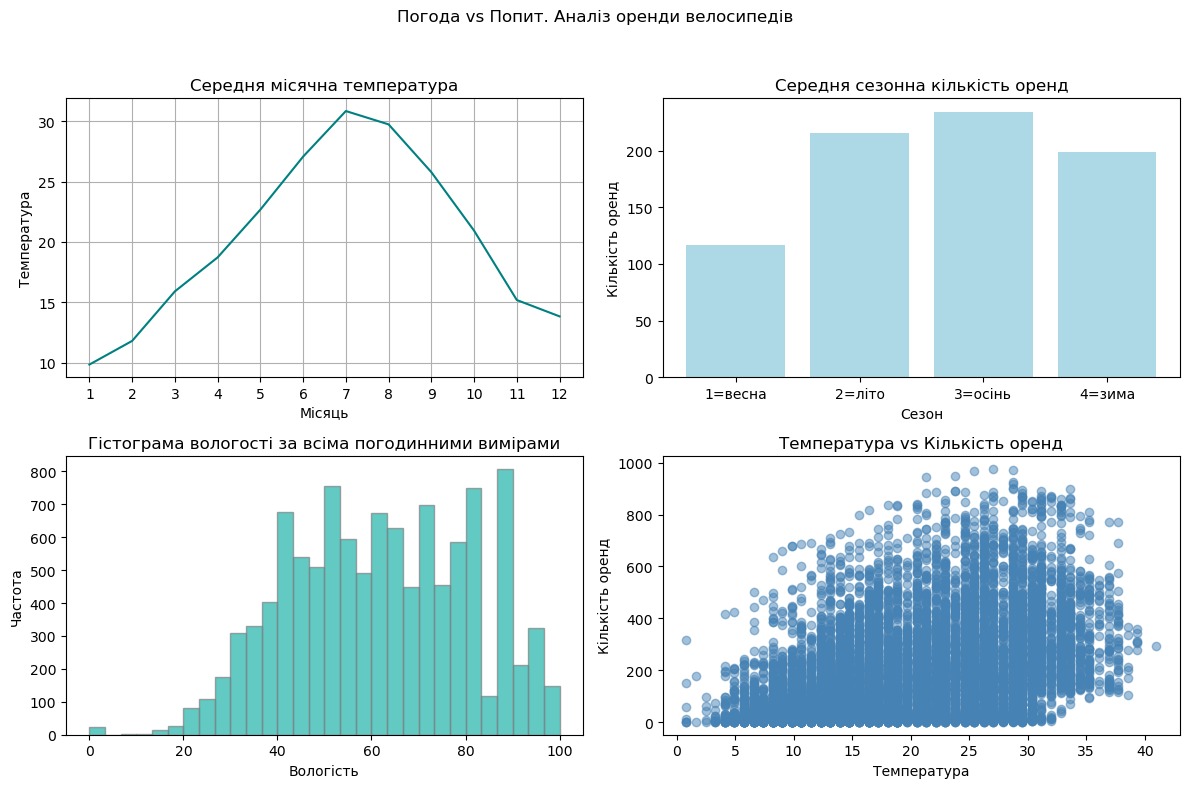

In [12]:
plt.figure(figsize=(12,8))

#Графік 1
plt.subplot(2, 2, 1)
plt.plot(monthly_avg_temp, color='teal')
plt.title('Середня місячна температура')
plt.xlabel('Місяць')
plt.xticks(range(1,13))
plt.ylabel('Температура')
plt.grid(True)

#Графік 2
plt.subplot(2, 2, 2)
plt.bar(seasons, season_avg_rent, color='lightblue')
plt.title('Середня сезонна кількість оренд')
plt.xlabel('Сезон')
plt.xticks(range(1,5), labels=['1=весна', '2=літо', '3=осінь', '4=зима'])
# plt.xticklabels(['1=весна', '2=літо', '3=осінь', '4=зима'])
plt.ylabel('Кількість оренд')

#Графік 3
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=30, color='lightseagreen', alpha=0.7, edgecolor='grey')
plt.title('Гістограма вологості за всіма погодинними вимірами')
plt.xlabel('Вологість')
plt.ylabel('Частота')

#Графік 4
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], color='steelblue', alpha=0.5)
plt.title('Температура vs Кількість оренд')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')


#Заголовок дашборду
plt.suptitle('Погода vs Попит. Аналіз оренди велосипедів')
plt.tight_layout(rect=[0, 0, 1, 0.95])

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

In [13]:
monthes = df['month'].unique()
monthes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

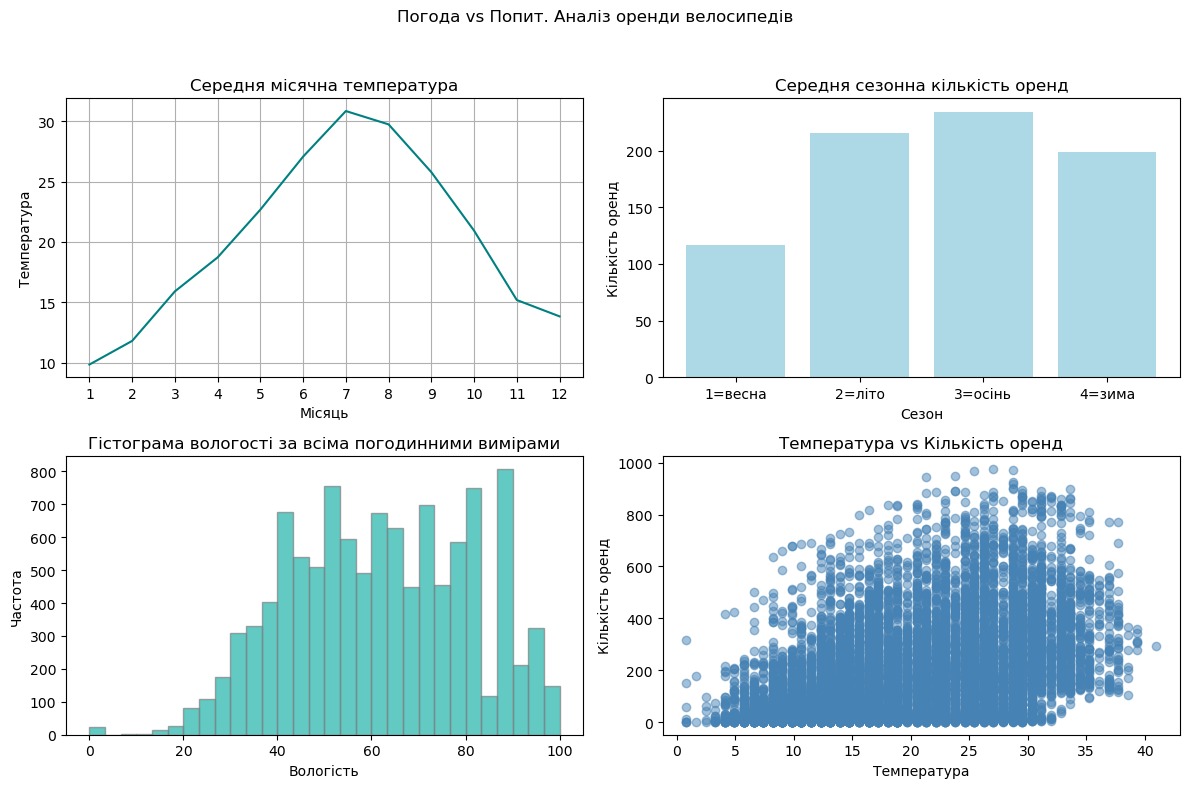

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

#Графік 1
ax[0, 0].plot(monthes, monthly_avg_temp, color='teal')
ax[0, 0].set_title('Середня місячна температура')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_xticks(monthes)
ax[0, 0].set_ylabel('Температура')
ax[0, 0].grid(True)

#Графік 2
ax[0, 1].bar(seasons, season_avg_rent, color='lightblue')
ax[0, 1].set_title('Середня сезонна кількість оренд')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_xticks(range(1,5), labels=['1=весна', '2=літо', '3=осінь', '4=зима'])
ax[0, 1].set_ylabel('Кількість оренд')

#Графік 3
ax[1, 0].hist(df['humidity'], bins=30, color='lightseagreen', alpha=0.7, edgecolor='grey')
ax[1, 0].set_title('Гістограма вологості за всіма погодинними вимірами')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Частота')

#Графік 4
ax[1, 1].scatter(df['temp'], df['count'], color='steelblue', alpha=0.5)
ax[1, 1].set_title('Температура vs Кількість оренд')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренд')


#Заголовок дашборду
fig.suptitle('Погода vs Попит. Аналіз оренди велосипедів')
plt.tight_layout(rect=[0, 0, 1, 0.95])

**Різниця в побудові кількох графіків на одній фігурі з `plt.subplots()` та `plt.subplot()`**
- Підхід з `plt.subplots()` дозволяє напряму звернутись до кожного графіка за допомогою `ax[i, j].необхідні_налаштування()`, а при підході з `plt.subplot()` кожен раз потрібно змінювати панель і встановлювати поточну вісь `plt.subplot(i, j, номер_панелі)`;
- Якщо потрібно зробити зміни в розмірі сітки, то в підході з `plt.subplot()` це зробити важче;
- При великій кількості графіків з `plt.subplots()` легше зрозуміти які властивості якому графіку відповідають за рахунок чіткого доступу до осі з `ax[i, j].`;
- При маленькій кількості графіків (2-3) все ж `plt.subplot()` читається легше;
- Підхід з `plt.subplots()` дає можливість швидко пройтись циклом по змінній `ax`.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [15]:
monthly_stats = df['count'].resample('ME').agg(['mean', 'max', 'min'])
monthly_stats

,mean,max,min
datetime,,,
2011-01-31,54.645012,219,1
2011-02-28,73.641256,327,1
2011-03-31,86.849776,332,1
2011-04-30,111.026374,452,1
2011-05-31,174.809211,611,1
2011-06-30,196.877193,638,1
2011-07-31,203.614035,596,1
2011-08-31,182.666667,600,1
2011-09-30,174.622517,628,1


In [ ]:
import matplotlib.dates as mdates

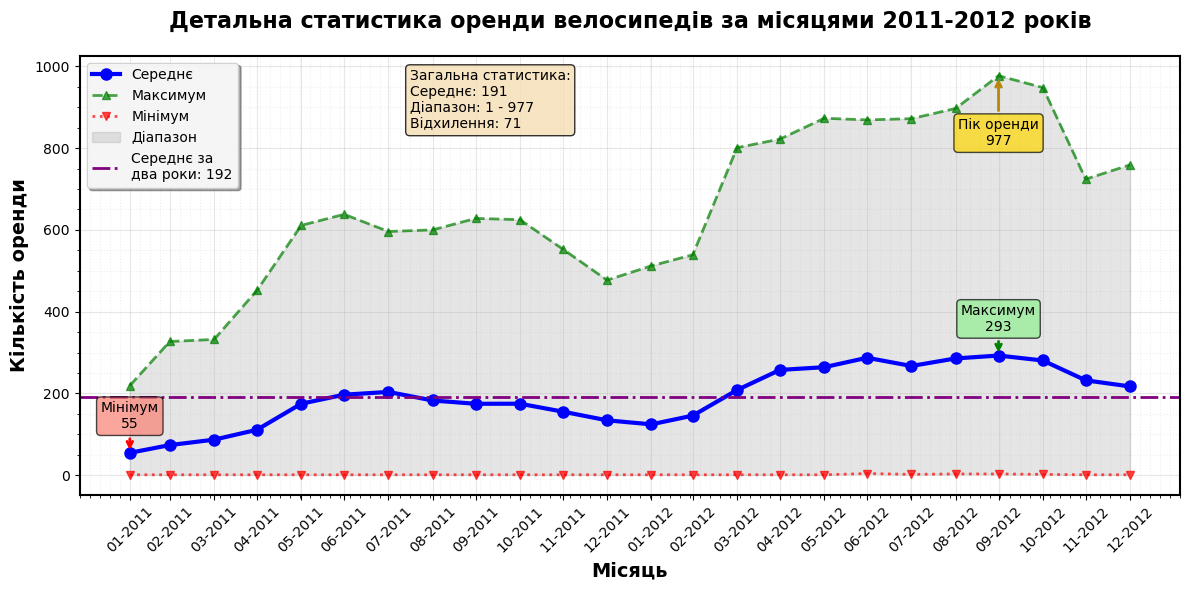

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

# Малюємо лінії з різними стилями
ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)

# Заливка між max та min (правильний синтаксис)
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'],
                alpha=0.2, color='gray', label='Діапазон')

# Додаємо анотації для пікового значення
max_idx = monthly_stats['max'].idxmax()
max_val = monthly_stats['max'].max()
ax.annotate(f'Пік оренди\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val - 170),
            arrowprops=dict(arrowstyle='->', color='darkgoldenrod', lw=2),
            fontsize=10, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='gold', alpha=0.7))

# Додаємо анотації для найбільшого середнього значення
mean_max_idx = monthly_stats['mean'].idxmax()
mean_max_val = monthly_stats['mean'].max()
ax.annotate(f'Максимум\n{mean_max_val:.0f}',
            xy=(mean_max_idx, mean_max_val), xytext=(mean_max_idx, mean_max_val + 60),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=10, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

# Додаємо анотації для найменшого середнього значення
mean_min_idx = monthly_stats['mean'].idxmin()
mean_min_val = monthly_stats['mean'].min()
ax.annotate(f'Мінімум\n{mean_min_val:.0f}',
            xy=(mean_min_idx, mean_min_val), xytext=(mean_min_idx, mean_min_val + 60),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='salmon', alpha=0.7))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренди', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренди велосипедів за місяцями 2011-2012 років',
             fontsize=16, fontweight='bold', pad=20)

# Форматування міток осі x (щоб не було візуального зсуву праворуч по осі x)
ax.set_xticks(
    ticks=monthly_stats.index,
    labels=[d.strftime('%m-%Y') for d in monthly_stats.index],
    rotation=45
)

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Додаємо середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за \nдва роки: {overall_mean:.0f}')

# Покращуємо легенду
ax.legend(loc='upper left', fontsize=10, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

# Додаємо текст з додатковою статистикою
textstr = "Загальна статистика:\n"
textstr += f"Середнє: {monthly_stats['mean'].mean():.0f}\n"
textstr += f"Діапазон: {monthly_stats['min'].min():.0f} - {monthly_stats['max'].max():.0f}\n"
textstr += f"Відхилення: {monthly_stats['mean'].std():.0f}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.3, 0.97, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()

**Відповіді на питання:**
1. Анотації допомагають закцентувати увагу на важливих точках, зробити підписи прямо на графіку для швидкого розуміння деталей.
2. `fill_between()` використовується для заливки кольором області між двома лініями.
3. Текстовий блок дає можливість навести додаткову статистику прямо на графіку, з можливістю необхідного позиціонування.

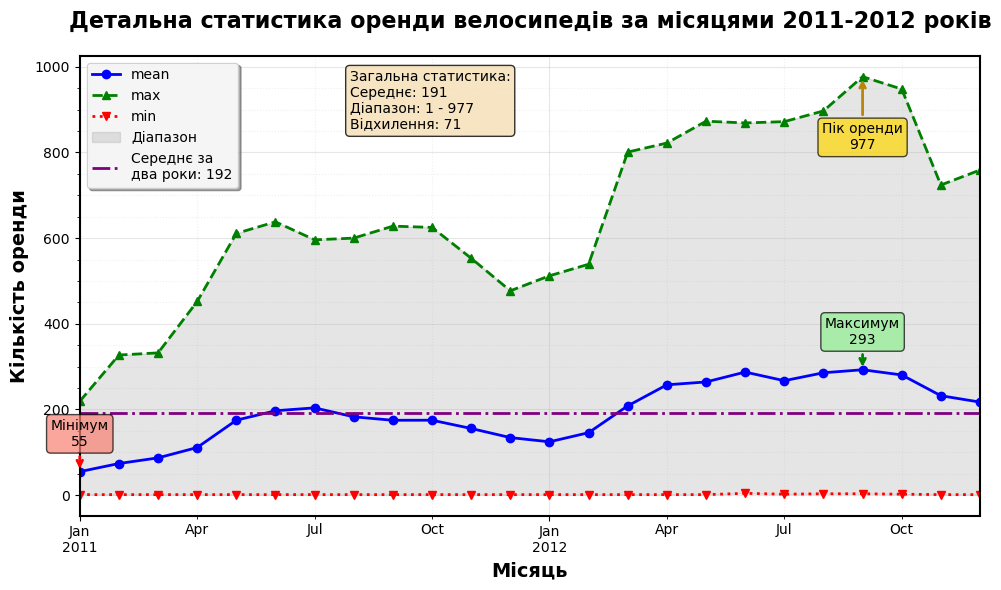

In [18]:
# Побудова графіка з Pandas

# Малюємо лінії з різними стилями
ax = monthly_stats.plot(style=['bo-', 'g^--', 'rv:'], linewidth=2, figsize=(10, 6))


# Заливка між max та min (правильний синтаксис)
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'],
                alpha=0.2, color='gray', label='Діапазон')

# Додаємо анотації для пікового значення
max_idx = monthly_stats['max'].idxmax()
max_val = monthly_stats['max'].max()
ax.annotate(f'Пік оренди\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val - 170),
            arrowprops=dict(arrowstyle='->', color='darkgoldenrod', lw=2),
            fontsize=10, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='gold', alpha=0.7))

# Додаємо анотації для найбільшого середнього значення
mean_max_idx = monthly_stats['mean'].idxmax()
mean_max_val = monthly_stats['mean'].max()
ax.annotate(f'Максимум\n{mean_max_val:.0f}',
            xy=(mean_max_idx, mean_max_val), xytext=(mean_max_idx, mean_max_val + 60),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=10, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))

# Додаємо анотації для найменшого середнього значення
mean_min_idx = monthly_stats['mean'].idxmin()
mean_min_val = monthly_stats['mean'].min()
ax.annotate(f'Мінімум\n{mean_min_val:.0f}',
            xy=(mean_min_idx, mean_min_val), xytext=(mean_min_idx, mean_min_val + 60),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='salmon', alpha=0.7))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренди', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренди велосипедів за місяцями 2011-2012 років',
             fontsize=16, fontweight='bold', pad=20)

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Додаємо середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за \nдва роки: {overall_mean:.0f}')

# Покращуємо легенду
ax.legend(loc='upper left', fontsize=10, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

# Додаємо текст з додатковою статистикою
textstr = "Загальна статистика:\n"
textstr += f"Середнє: {monthly_stats['mean'].mean():.0f}\n"
textstr += f"Діапазон: {monthly_stats['min'].min():.0f} - {monthly_stats['max'].max():.0f}\n"
textstr += f"Відхилення: {monthly_stats['mean'].std():.0f}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.3, 0.97, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()